# Rolling correlations
* 10 years of S&P500 data from https://finance.yahoo.com/quote/%5EGSPC/history/
* S&P500 does not trade on weekend days (+-252 trading days per year)
* Does it make sense to look at corr of daily returns? Compare monthly.

In [2]:
# Imports
%matplotlib inline
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# Get price data
bitcoin = quandl.get("BCHAIN/MKPRU")
sp500 = pd.read_csv('^GSPC.csv', index_col = 0, parse_dates = [0])

In [77]:
sp500.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-12,1194.939941,1199.199951,1194.709961,1196.479980,1196.479980,4607090000
2010-04-13,1195.939941,1199.040039,1188.819946,1197.300049,1197.300049,5403580000
2010-04-14,1198.689941,1210.650024,1198.689941,1210.650024,1210.650024,5760040000
2010-04-15,1210.770020,1213.920044,1208.500000,1211.670044,1211.670044,5995330000
2010-04-16,1210.170044,1210.170044,1186.770020,1192.130005,1192.130005,8108470000
2010-04-19,1192.060059,1197.869995,1183.680054,1197.520020,1197.520020,6597740000
2010-04-20,1199.040039,1208.579956,1199.040039,1207.170044,1207.170044,5316590000
2010-04-21,1207.160034,1210.989990,1198.849976,1205.939941,1205.939941,5724310000
2010-04-22,1202.520020,1210.270020,1190.189941,1208.670044,1208.670044,6035780000


In [78]:
# Start 1 Jan 2011
bitcoin = bitcoin.loc['2011-01-01':]
sp500 = sp500.loc['2011-01-01':]

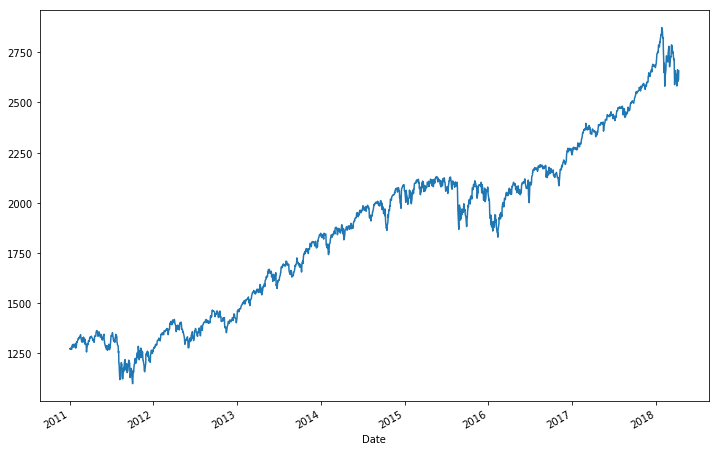

In [80]:
# Visual check of price data
sp500['Close'].plot(figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12411ac10>,
      dtype=object)

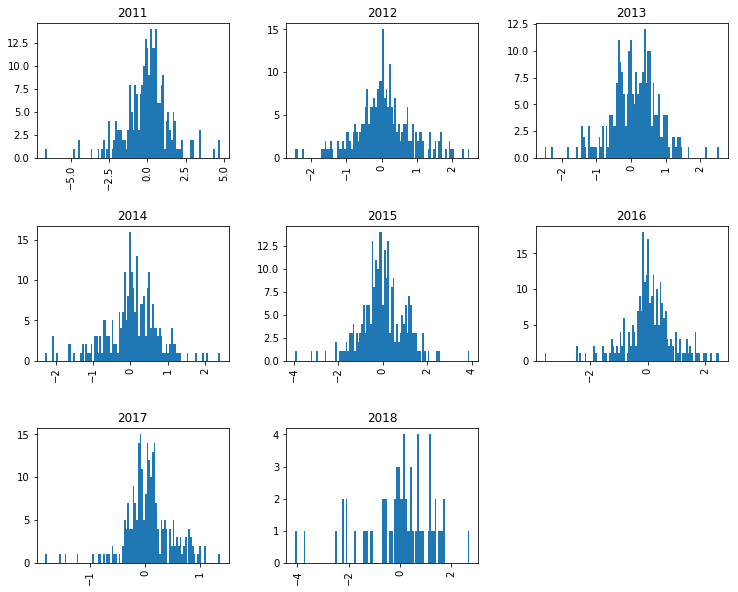

In [81]:
(sp500['Close'].pct_change() * 100).hist(bins=100, figsize = (12,10), by = lambda x: x.year)

In [86]:
sp500 = pd.DataFrame(sp500['Close'])

In [87]:
# Join data using S&P500 dates
data = sp500.join(bitcoin)

In [88]:
data.columns = ['bitcoin','sp500']

In [91]:
data.head(20)

,bitcoin,sp500,sp500_ret,bitcoin_ret
Date,,,,
2011-01-04,1270.199951,0.299899,-0.000330,-0.001313
2011-01-05,1276.560059,0.298998,-0.003004,0.005007
2011-01-06,1273.849976,0.299000,0.000007,-0.002123
2011-01-07,1271.500000,0.322000,0.076923,-0.001845
2011-01-10,1269.750000,0.329000,0.021739,-0.001376
2011-01-11,1274.479980,0.329000,0.000000,0.003725
2011-01-12,1285.959961,0.350000,0.063830,0.009008
2011-01-13,1283.760010,0.405000,0.157143,-0.001711
2011-01-14,1293.239990,0.450000,0.111111,0.007385


In [90]:
# Calculate returns from prices
data['sp500_ret'] = data['sp500'].pct_change()
data['bitcoin_ret'] = data['bitcoin'].pct_change()
data.dropna(inplace = True)

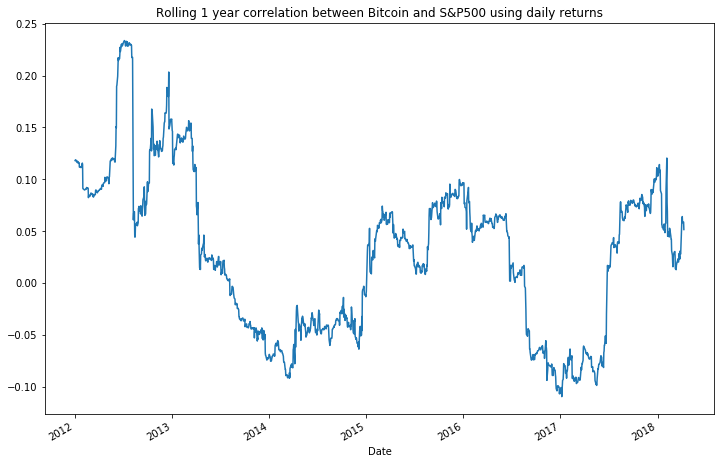

In [102]:
title = "Rolling 1 year correlation between Bitcoin and S&P500 using daily returns"
data['sp500_ret'].rolling(window=252).corr(data['bitcoin_ret']).plot(figsize = (12,8), title = title)

In [97]:
weekly = data.resample('W').last()

In [99]:
weekly['sp500_ret'] = weekly['sp500'].pct_change()
weekly['bitcoin_ret'] = weekly['bitcoin'].pct_change()
weekly.head(10)

,bitcoin,sp500,sp500_ret,bitcoin_ret
Date,,,,
2011-01-09,1271.500000,0.32200,NaN,NaN
2011-01-16,1293.239990,0.45000,0.397516,0.017098
2011-01-23,1283.349976,0.44000,-0.022222,-0.007647
2011-01-30,1276.339966,0.45000,0.022727,-0.005462
2011-02-06,1310.869995,0.88000,0.955556,0.027054
2011-02-13,1329.150024,1.00650,0.143750,0.013945
2011-02-20,1343.010010,1.05019,0.043408,0.010428
2011-02-27,1319.880005,1.00000,-0.047791,-0.017223
2011-03-06,1321.150024,0.93920,-0.060800,0.000962


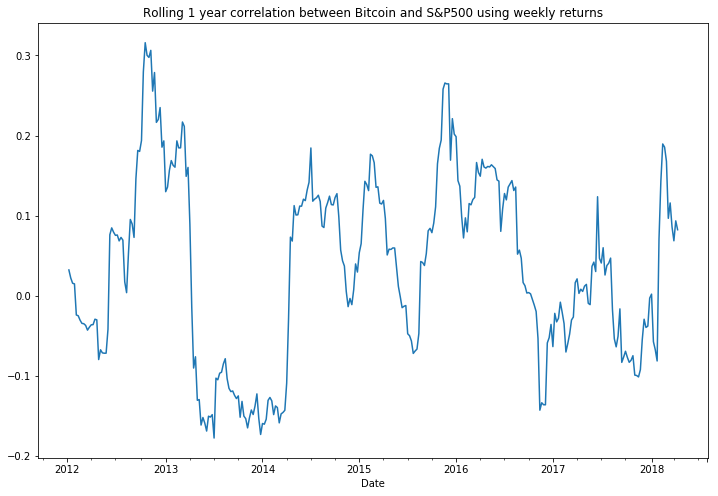

In [107]:
title = "Rolling 1 year correlation between Bitcoin and S&P500 using weekly returns"
weekly['sp500_ret'].rolling(window=52).corr(weekly['bitcoin_ret']).plot(figsize = (12,8), title = title)

In [103]:
monthly = data.resample('M').last()
monthly['sp500_ret'] = monthly['sp500'].pct_change()
monthly['bitcoin_ret'] = monthly['bitcoin'].pct_change()
monthly.head(10)

,bitcoin,sp500,sp500_ret,bitcoin_ret
Date,,,,
2011-01-31,1286.119995,0.500000,NaN,NaN
2011-02-28,1327.219971,0.949231,0.898462,0.031957
2011-03-31,1325.829956,0.800980,-0.156180,-0.001047
2011-04-30,1363.609985,2.700000,2.370871,0.028495
2011-05-31,1345.199951,9.499800,2.518444,-0.013501
2011-06-30,1320.640015,17.500000,0.842144,-0.018257
2011-07-31,1292.280029,13.800000,-0.211429,-0.021474
2011-08-31,1218.890015,9.000000,-0.347826,-0.056791
2011-09-30,1131.420044,5.350000,-0.405556,-0.071762


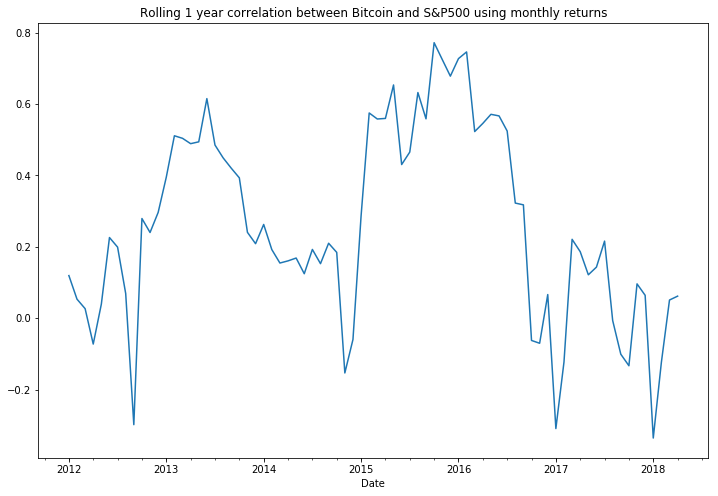

In [108]:
title = "Rolling 1 year correlation between Bitcoin and S&P500 using monthly returns"
monthly['sp500_ret'].rolling(window=12).corr(monthly['bitcoin_ret']).plot(figsize = (12,8), title = title)